In [6]:
import sys
sys.path.append('../')  # Adjust the path to point to the parent directory of 'scripts'

import pandas as pd
import matplotlib.pyplot as plt

from scripts.utils import load_data
from scripts.utils_features import calculate_rsi

In [7]:
symbol = 'BROCCOLIUSDT'
interval = '5'  # Kline interval (1m, 5m, 15m, etc.)

df_data_kline = load_data(f'../data/kline/{symbol}/{interval}')

date_start = '2025-02-21'

df_data_kline['startTime'] = pd.to_datetime(df_data_kline['startTime'], unit='ms')
df_data_kline = df_data_kline[df_data_kline['startTime'] >= date_start]

c:\workspace\crypto\janebot-analytics\notebooks\..\scripts\utils.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat(all_files, ignore_index=True)


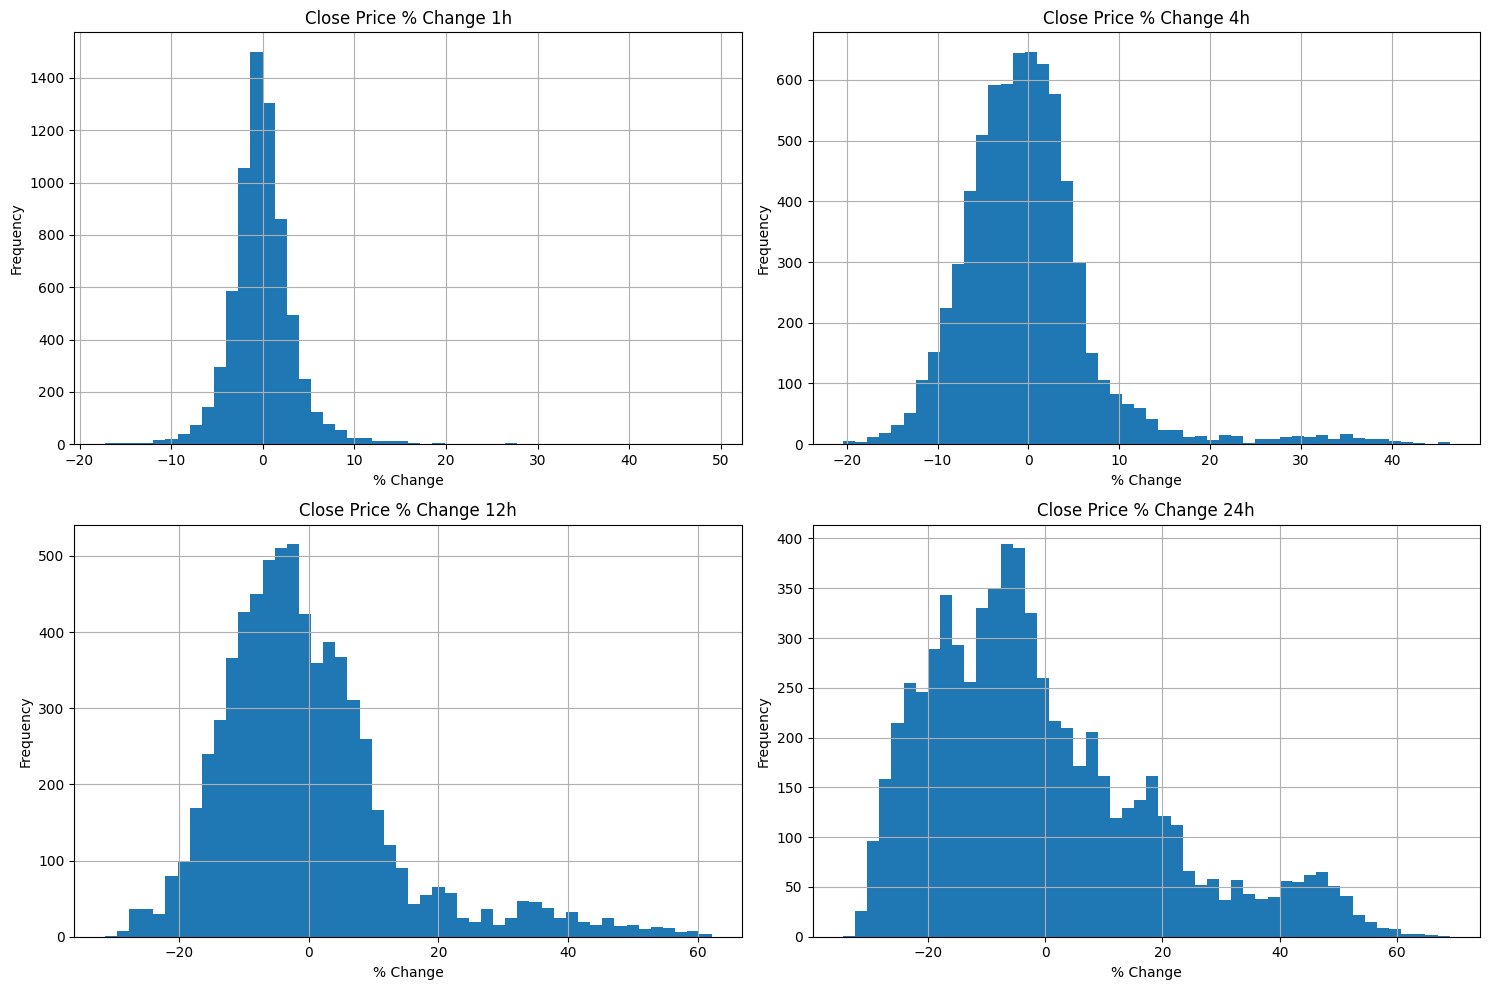

In [22]:
df_data_kline['closePrice_pct_change_1h'] = df_data_kline['closePrice'].pct_change(periods=12) * 100  # 12 intervals of 5 minutes each make 1 hour
df_data_kline['closePrice_pct_change_4h'] = df_data_kline['closePrice'].pct_change(periods=48) * 100  # 12 intervals of 5 minutes each make 1 hour
df_data_kline['closePrice_pct_change_12h'] = df_data_kline['closePrice'].pct_change(periods=144) * 100  # 12 intervals of 5 minutes each make 1 hour
df_data_kline['closePrice_pct_change_24h'] = df_data_kline['closePrice'].pct_change(periods=288) * 100  # 12 intervals of 5 minutes each make 1 hour

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df_data_kline['closePrice_pct_change_1h'].hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Close Price % Change 1h')
axes[0, 0].set_xlabel('% Change')
axes[0, 0].set_ylabel('Frequency')

df_data_kline['closePrice_pct_change_4h'].hist(bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Close Price % Change 4h')
axes[0, 1].set_xlabel('% Change')
axes[0, 1].set_ylabel('Frequency')

df_data_kline['closePrice_pct_change_12h'].hist(bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Close Price % Change 12h')
axes[1, 0].set_xlabel('% Change')
axes[1, 0].set_ylabel('Frequency')

df_data_kline['closePrice_pct_change_24h'].hist(bins=50, ax=axes[1, 1])
axes[1, 1].set_title('Close Price % Change 24h')
axes[1, 1].set_xlabel('% Change')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


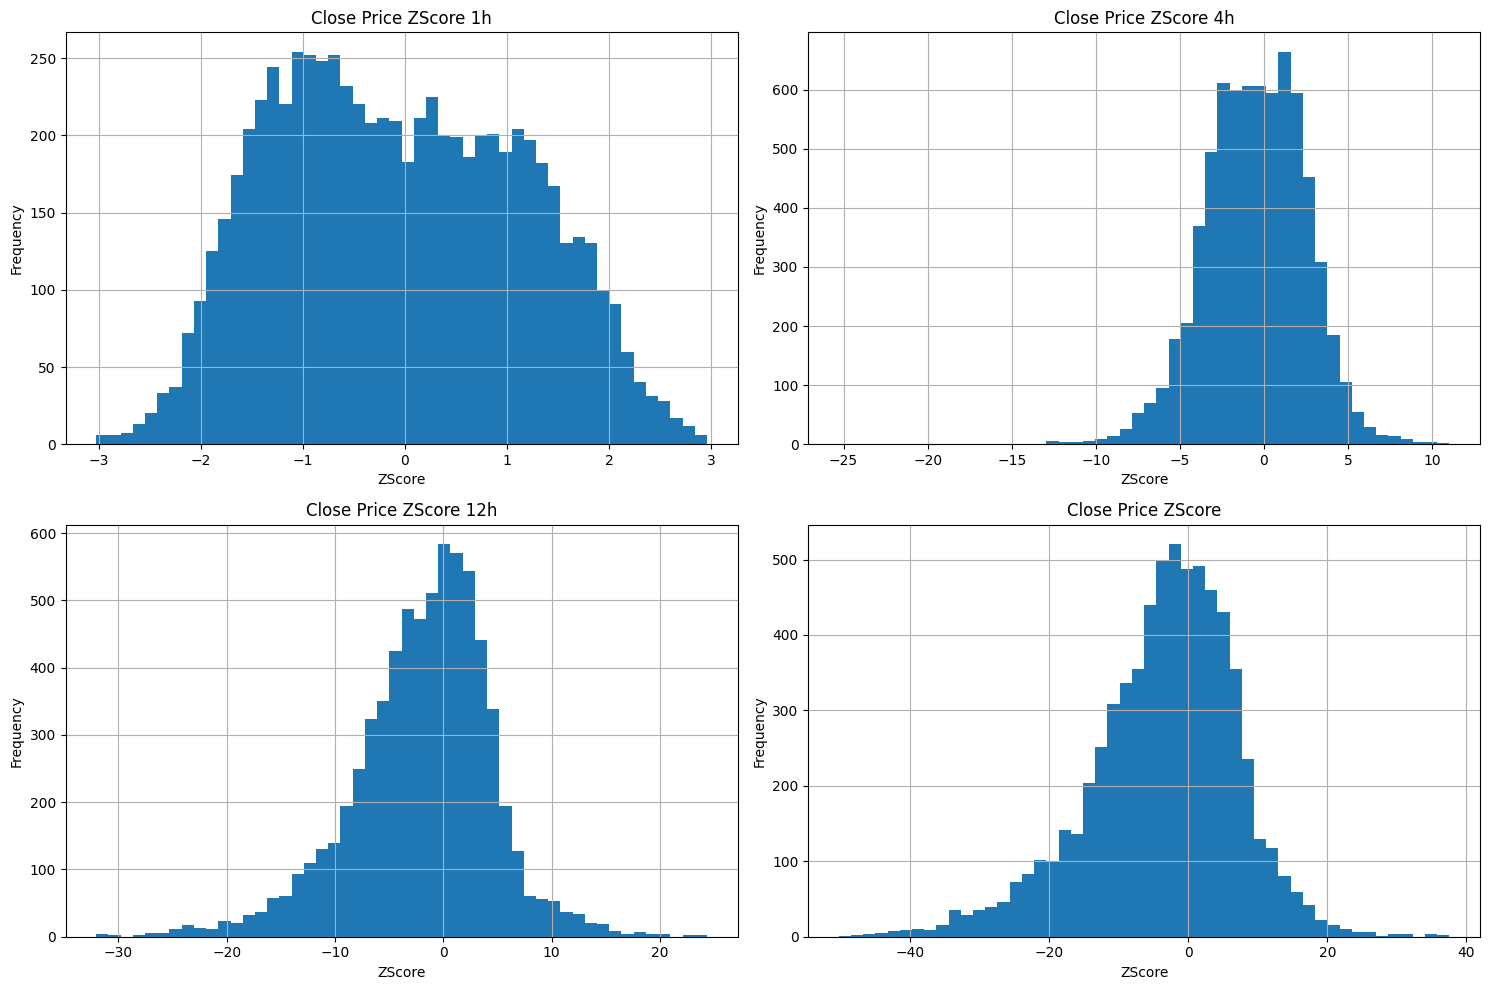

In [23]:
df_data_kline['closePrice_zscore_1h'] = (df_data_kline['closePrice'] - df_data_kline['closePrice'].rolling(12).mean()) / df_data_kline['closePrice'].rolling(12).std()
df_data_kline['closePrice_zscore_4h'] = (df_data_kline['closePrice'] - df_data_kline['closePrice'].rolling(48).mean()) / df_data_kline['closePrice'].rolling(12).std()
df_data_kline['closePrice_zscore_12h'] = (df_data_kline['closePrice'] - df_data_kline['closePrice'].rolling(144).mean()) / df_data_kline['closePrice'].rolling(12).std()
df_data_kline['closePrice_zscore_24h'] = (df_data_kline['closePrice'] - df_data_kline['closePrice'].rolling(288).mean()) / df_data_kline['closePrice'].rolling(12).std()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df_data_kline['closePrice_zscore_1h'].hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Close Price ZScore 1h')
axes[0, 0].set_xlabel('ZScore')
axes[0, 0].set_ylabel('Frequency')

df_data_kline['closePrice_zscore_4h'].hist(bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Close Price ZScore 4h')
axes[0, 1].set_xlabel('ZScore')
axes[0, 1].set_ylabel('Frequency')

df_data_kline['closePrice_zscore_12h'].hist(bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Close Price ZScore 12h')
axes[1, 0].set_xlabel('ZScore')
axes[1, 0].set_ylabel('Frequency')

df_data_kline['closePrice_zscore_24h'].hist(bins=50, ax=axes[1, 1])
axes[1, 1].set_title('Close Price ZScore')
axes[1, 1].set_xlabel('ZScore')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

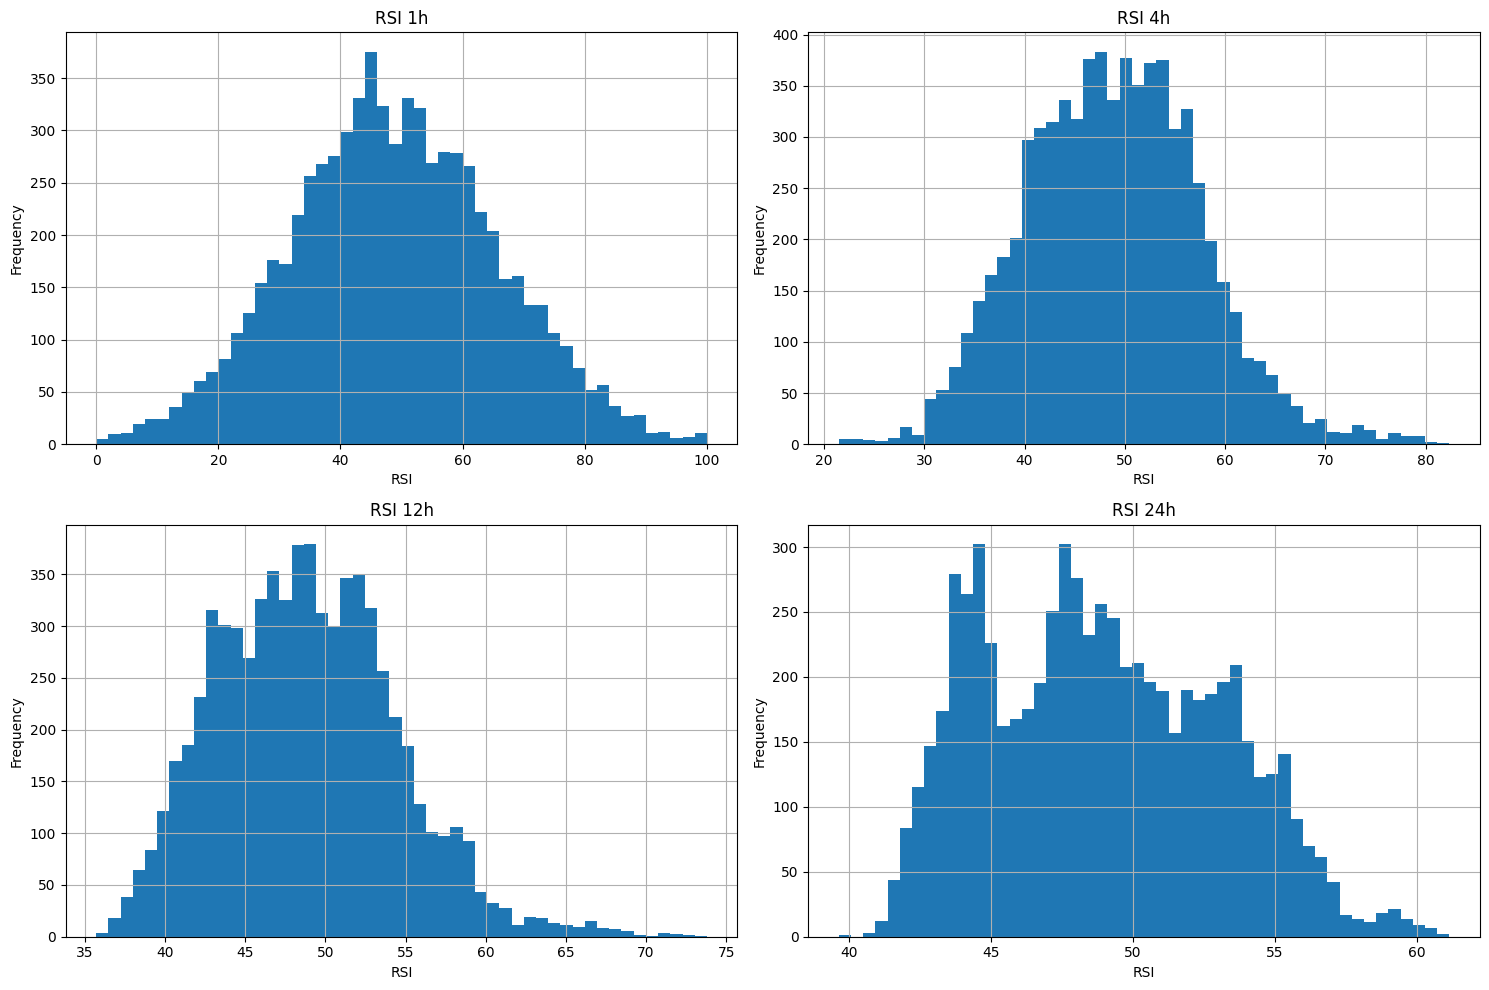

In [8]:
df_data_kline['rsi_1h'] = calculate_rsi(df_data_kline, period=12)
df_data_kline['rsi_4h'] = calculate_rsi(df_data_kline, period=48)
df_data_kline['rsi_12h'] = calculate_rsi(df_data_kline, period=144)
df_data_kline['rsi_24h'] = calculate_rsi(df_data_kline, period=288)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df_data_kline['rsi_1h'].hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title('RSI 1h')
axes[0, 0].set_xlabel('RSI')
axes[0, 0].set_ylabel('Frequency')

df_data_kline['rsi_4h'].hist(bins=50, ax=axes[0, 1])
axes[0, 1].set_title('RSI 4h')
axes[0, 1].set_xlabel('RSI')
axes[0, 1].set_ylabel('Frequency')

df_data_kline['rsi_12h'].hist(bins=50, ax=axes[1, 0])
axes[1, 0].set_title('RSI 12h')
axes[1, 0].set_xlabel('RSI')
axes[1, 0].set_ylabel('Frequency')

df_data_kline['rsi_24h'].hist(bins=50, ax=axes[1, 1])
axes[1, 1].set_title('RSI 24h')
axes[1, 1].set_xlabel('RSI')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

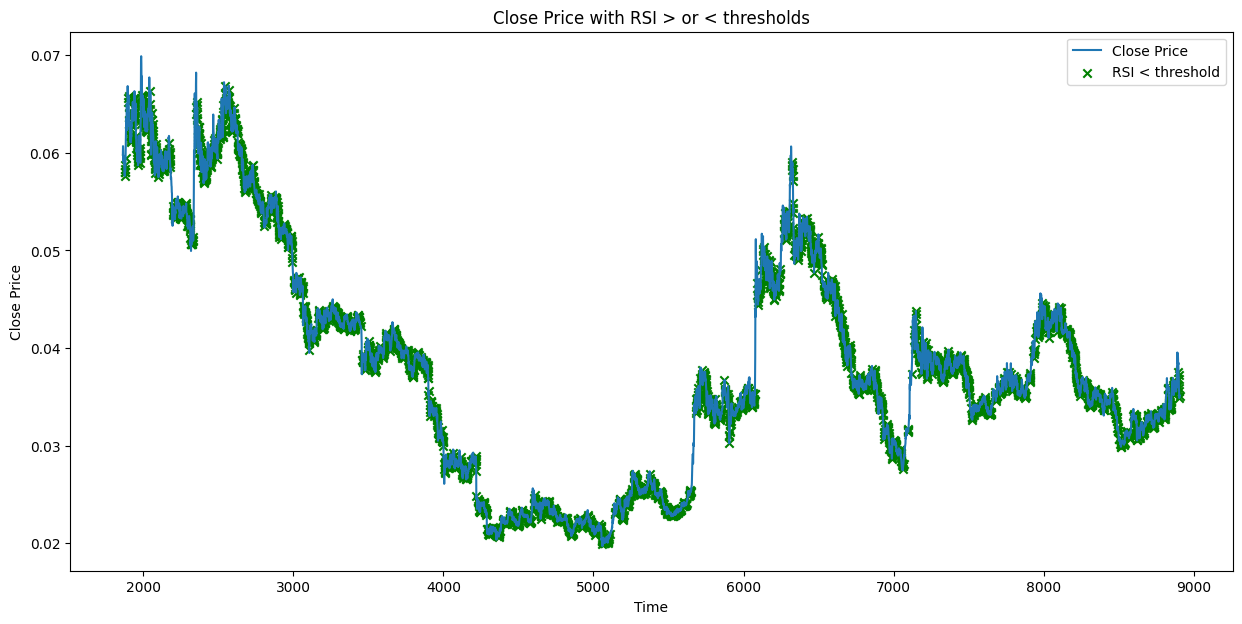

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))

df_data_kline['closePrice'].plot(ax=ax, label='Close Price')
ax.set_title('Close Price with RSI > or < thresholds')
ax.set_xlabel('Time')
ax.set_ylabel('Close Price')

rsi_1h_above_threshold = df_data_kline[df_data_kline['rsi_1h'] > 70]
ax.scatter(rsi_1h_above_threshold.index, rsi_1h_above_threshold['closePrice'], color='red', label='RSI > threshold', marker='o')

rsi_1h_below_threshold = df_data_kline[(df_data_kline['rsi_1h'] < 60) & (df_data_kline['rsi_1h'] > 20)]
ax.scatter(rsi_1h_below_threshold.index, rsi_1h_below_threshold['closePrice'], color='green', label='RSI < threshold', marker='x')

rsi_1h_below_threshold = df_data_kline[df_data_kline['rsi_1h'] < 20]
ax.scatter(rsi_1h_below_threshold.index, rsi_1h_below_threshold['closePrice'], color='blue', label='RSI < threshold', marker='x')

ax.legend()
plt.show()